**PART-1**

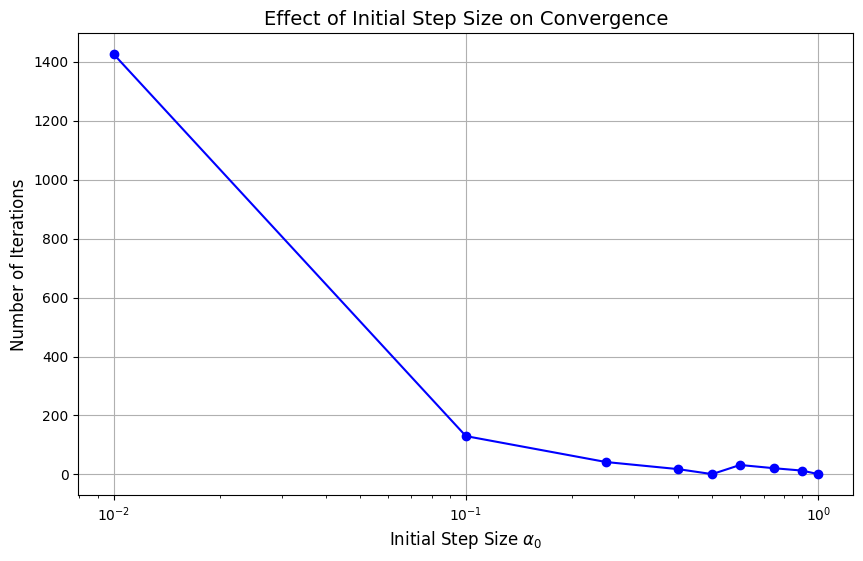

Alpha_0                                 Minimizer  Objective_Value  \
0     1.00                             [-49.0, 36.0]     0.000000e+00   
1     0.90     [-48.9999999999851, 36.0000000000064]     2.629979e-22   
2     0.75   [-48.99999999996612, 36.00000000001455]     1.359523e-21   
3     0.60  [-48.999999999972516, 36.00000000001181]     8.948166e-22   
4     0.50                             [-49.0, 36.0]     0.000000e+00   
5     0.40  [-48.99999999996094, 36.000000000016776]     1.807000e-21   
6     0.25   [-48.99999999996612, 36.00000000001455]     1.359523e-21   
7     0.10  [-48.99999999996243, 36.000000000016136]     1.672152e-21   
8     0.01  [-48.999999999954134, 36.00000000001969]     2.491309e-21   

   Iterations  
0           1  
1          13  
2          21  
3          32  
4           1  
5          18  
6          42  
7         130  
8        1426

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2 #objective function

def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

# x0: Initial point
# tau: Stopping tolerance
# alpha0: Initial step size
# gamma : Armijo condition constant
# rho : Step size reduction factor

def gradient_descent_backtracking(x0, tau, alpha0, gamma=0.5, rho=0.5, max_iter=10000):
    x = x0
    grad = grad_g(x)
    num_iter = 0

    while np.linalg.norm(grad) > tau:
        # Backtracking line search
        alpha = alpha0
        while g(x - alpha * grad) > g(x) - gamma * alpha * np.dot(grad, grad):
            alpha *= rho


        x = x - alpha * grad #updating x
        grad = grad_g(x)
        num_iter += 1

    return x, g(x), num_iter

x0 = np.array([100.0, 100.0])
tau = 1e-10
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
gamma = 0.5
rho = 0.5


results = []

for alpha0 in alpha_values:
    x_min, g_min, num_iter = gradient_descent_backtracking(x0, tau, alpha0, gamma, rho)
    results.append((alpha0, x_min, g_min, num_iter))

df_results = pd.DataFrame(results, columns=["Alpha_0", "Minimizer", "Objective_Value", "Iterations"])

plt.figure(figsize=(10, 6))
plt.plot(df_results["Alpha_0"], df_results["Iterations"], marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel(r"Initial Step Size $\alpha_0$", fontsize=12)
plt.ylabel("Number of Iterations", fontsize=12)
plt.title("Effect of Initial Step Size on Convergence", fontsize=14)
plt.grid(True)
plt.show()
df_results


**PART-2**

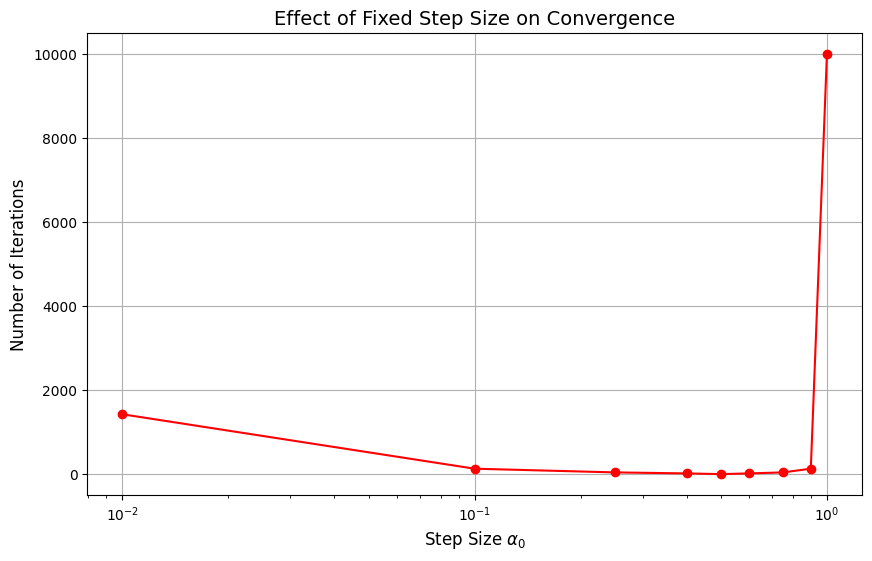

Alpha_0                                 Minimizer  Objective_Value  \
0     1.00                            [100.0, 100.0]     2.629700e+04   
1     0.90  [-48.99999999996243, 36.000000000016136]     1.672152e-21   
2     0.75   [-48.99999999996612, 36.00000000001455]     1.359523e-21   
3     0.60  [-48.99999999996094, 36.000000000016776]     1.807000e-21   
4     0.50                             [-49.0, 36.0]     0.000000e+00   
5     0.40  [-48.99999999996094, 36.000000000016776]     1.807000e-21   
6     0.25   [-48.99999999996612, 36.00000000001455]     1.359523e-21   
7     0.10  [-48.99999999996243, 36.000000000016136]     1.672152e-21   
8     0.01  [-48.999999999954134, 36.00000000001969]     2.491309e-21   

   Iterations  
0       10000  
1         130  
2          42  
3          18  
4           1  
5          18  
6          42  
7         130  
8        1426

In [ ]:
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

def gradient_descent_fixed_step(x0, tau, alpha, max_iter=10000):
    x = x0
    grad = grad_g(x)
    num_iter = 0

    while np.linalg.norm(grad) > tau and num_iter < max_iter:
        x = x - alpha * grad
        grad = grad_g(x)
        num_iter += 1

    return x, g(x), num_iter

x0 = np.array([100.0, 100.0])
tau = 1e-10
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

results_fixed_step = []

for alpha in alpha_values:
    x_min, g_min, num_iter = gradient_descent_fixed_step(x0, tau, alpha)
    results_fixed_step.append((alpha, x_min, g_min, num_iter))

df_fixed_step = pd.DataFrame(
    results_fixed_step, columns=["Alpha_0", "Minimizer", "Objective_Value", "Iterations"]
)

plt.figure(figsize=(10, 6))
plt.plot(df_fixed_step["Alpha_0"], df_fixed_step["Iterations"], marker='o', linestyle='-', color='r')
plt.xscale('log')
plt.xlabel(r"Step Size $\alpha_0$", fontsize=12)
plt.ylabel("Number of Iterations", fontsize=12)
plt.title("Effect of Fixed Step Size on Convergence", fontsize=14)
plt.grid(True)
plt.show()
df_fixed_step


**COMPARISON OF " gradient descent with backtracking line search " WITH "gradient descent procedure with fixed step-length" :**

In [ ]:
comparison_results = []

for alpha0 in alpha_values:

    _, _, num_iter_backtracking = gradient_descent_backtracking(x0, tau, alpha0, gamma, rho) # backtracking line search

    _, _, num_iter_fixed = gradient_descent_fixed_step(x0, tau, alpha0)  # fixed step-length

    comparison_results.append((alpha0, num_iter_backtracking, num_iter_fixed))


df_comparison = pd.DataFrame(
    comparison_results, columns=["Alpha_0", "Backtracking_Iterations", "Fixed_Step_Iterations"]
)
print(df_comparison)


   Alpha_0  Backtracking_Iterations  Fixed_Step_Iterations
0     1.00                        1                  10000
1     0.90                       13                    130
2     0.75                       21                     42
3     0.60                       32                     18
4     0.50                        1                      1
5     0.40                       18                     18
6     0.25                       42                     42
7     0.10                      130                    130
8     0.01                     1426                   1426


**Backtracking is better for 3 out of 8 alpha values that is when alpha > 0.60. For a larger initial step size (α₀), backtracking line search quickly converges in only 1 iteration. As the step size decreases (α₀), backtracking line search requires more iterations.**

PART-3

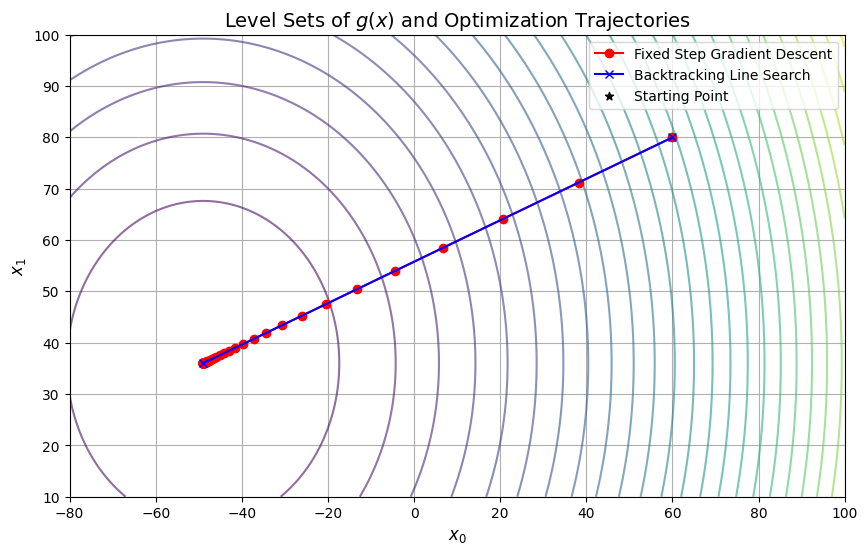

In [ ]:
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

def gradient_descent_fixed_step(x0, tau, alpha, max_iter=10000):
    x = x0
    grad = grad_g(x)
    trajectory = [x.copy()]
    num_iter = 0
    while np.linalg.norm(grad) > tau and num_iter < max_iter:
        x = x - alpha * grad
        grad = grad_g(x)
        trajectory.append(x.copy())
        num_iter += 1
    return np.array(trajectory), num_iter

def gradient_descent_backtracking(x0, tau, alpha0, gamma=0.5, rho=0.5, max_iter=10000):
    x = x0
    grad = grad_g(x)
    trajectory = [x.copy()]
    num_iter = 0
    while np.linalg.norm(grad) > tau and num_iter < max_iter:
        alpha = alpha0
        while g(x - alpha * grad) > g(x) - gamma * alpha * np.dot(grad, grad):
            alpha *= rho
        x = x - alpha * grad
        grad = grad_g(x)
        trajectory.append(x.copy())
        num_iter += 1
    return np.array(trajectory), num_iter

x0_vals = np.linspace(-80, 100, 400)  # grid for level sets
x1_vals = np.linspace(10, 100, 400)
X0, X1 = np.meshgrid(x0_vals, x1_vals)
Z = g([X0, X1])


x0 = np.array([60.0, 80.0])
tau = 1e-10 #tolerance


alpha_fixed = 0.1  #fixed step length
alpha0_backtracking = 1.0  # initial step size for backtracking line search

trajectory_fixed_step, _ = gradient_descent_fixed_step(x0, tau, alpha_fixed)
trajectory_backtracking, _ = gradient_descent_backtracking(x0, tau, alpha0_backtracking)


plt.figure(figsize=(10, 6))
plt.contour(X0, X1, Z, levels=30, cmap='viridis', alpha=0.6) #level set of g(x)


plt.plot(trajectory_fixed_step[:, 0], trajectory_fixed_step[:, 1], marker='o', color='r', label="Fixed Step Gradient Descent")
plt.plot(trajectory_backtracking[:, 0], trajectory_backtracking[:, 1], marker='x', color='b', label="Backtracking Line Search")

plt.scatter(x0[0], x0[1], color='k', marker='*', label="Starting Point") # starting point


plt.xlabel("$x_0$", fontsize=12)
plt.ylabel("$x_1$", fontsize=12)
plt.title("Level Sets of $g(x)$ and Optimization Trajectories", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



**Backtracking line search is more smoother as the step size adjust to the problem, thus it avoids large jumps. So it is performing better from fixed step gradient descent.**

**PART-4**

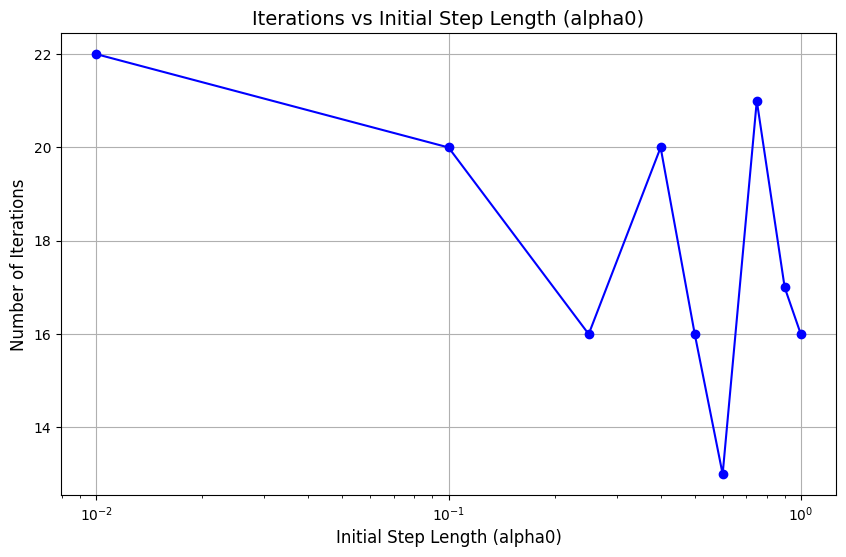

alpha0 = 1.00, Minimizer = [ 10.04940666 100.99210581], Final Value = 64.7935480949, Iterations = 16
alpha0 = 0.90, Minimizer = [ 10.04949728 100.9939134 ], Final Value = 64.7949962245, Iterations = 17
alpha0 = 0.75, Minimizer = [ 10.04974899 100.99904371], Final Value = 64.7991051387, Iterations = 21
alpha0 = 0.60, Minimizer = [ 10.04897744 100.98349624], Final Value = 64.7866518018, Iterations = 13
alpha0 = 0.50, Minimizer = [ 10.04940666 100.99210581], Final Value = 64.7935480949, Iterations = 16
alpha0 = 0.40, Minimizer = [ 10.04966472 100.99734678], Final Value = 64.7977458804, Iterations = 20
alpha0 = 0.25, Minimizer = [ 10.04940666 100.99210581], Final Value = 64.7935480949, Iterations = 16
alpha0 = 0.10, Minimizer = [ 10.04966472 100.99734678], Final Value = 64.7977458804, Iterations = 20
alpha0 = 0.01, Minimizer = [ 10.04877467 100.97944045], Final Value = 64.7834031580, Iterations = 22


In [ ]:
def f(x):
    x1, x2 = x[0], x[1]
    return 256 * (x2 - x1**2)**2 + (2 - x1)**2

def grad_f(x):
    x1, x2 = x[0], x[1]
    df_dx1 = -1024 * x1 * (x2 - x1**2) - 2 * (2 - x1)
    df_dx2 = 512 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])


def backtracking_line_search(xk, pk, alpha0, rho, gamma):
    alpha = alpha0
    while f(xk + alpha * pk) > f(xk) + gamma * alpha * np.dot(grad_f(xk), pk):
        alpha *= rho
    return alpha

def gradient_descent_backtracking(x0, tau, alpha0, rho, gamma):
    xk = np.array(x0, dtype=float)
    pk = -grad_f(xk)
    k = 0

    while np.linalg.norm(pk, 2) > tau:
        eta_k = backtracking_line_search(xk, pk, alpha0, rho, gamma)  # backtracking line search
        xk = xk + eta_k * pk
        pk = -grad_f(xk)
        k += 1

    return xk, f(xk), k


x0 = [100, 100]  # Starting point
tau = 1   # tolerance
rho = 0.5       # Reduction factor
gamma = 0.5     # Sufficient decrease factor
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]  # Initial step lengths


results = []
for alpha0 in alpha_values:
    minimizer, final_value, iterations = gradient_descent_backtracking(x0, tau, alpha0, rho, gamma)
    results.append((alpha0, minimizer, final_value, iterations))


iterations = [res[3] for res in results]
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, iterations, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Initial Step Length (alpha0)', fontsize=12)
plt.ylabel('Number of Iterations', fontsize=12)
plt.title('Iterations vs Initial Step Length (alpha0)', fontsize=14)
plt.grid(True)
plt.show()

for res in results:
    alpha0, minimizer, final_value, iterations = res
    print(f"alpha0 = {alpha0:.2f}, Minimizer = {minimizer}, Final Value = {final_value:.10f}, Iterations = {iterations}")